## Importando as bibliotecas

In [ ]:
import pandas as pd
import glob
import io
from google.colab import files

## Baixar o arquivo CSV dos dados sobre o consumo de cerveja... (Baixar o arquivo de https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo


## Subindo o arquivo que você baixou para o notebook

In [ ]:
arquivo_csv = files.upload()

Saving consumo_cerveja_sp.csv to consumo_cerveja_sp (1).csv


### Criando um data frame do Pandas para carregar os dados do CSV

In [ ]:
df_cerveja = pd.read_csv(io.BytesIO(arquivo_csv['consumo_cerveja_sp.csv']))

### Conhecendo o dataset

In [ ]:
df_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float32
 2   Temperatura Minima (C)       365 non-null    float32
 3   Temperatura Maxima (C)       365 non-null    float32
 4   Precipitacao (mm)            365 non-null    float32
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float32(4), float64(1), int64(1), object(1)
memory usage: 14.4+ KB


### Transformando as colunas String para Float

In [ ]:
df_cerveja['Temperatura Media (C)'] = df_cerveja['Temperatura Media (C)'].str.replace(',','.')
df_cerveja['Temperatura Media (C)'] = pd.to_numeric(df_cerveja["Temperatura Media (C)"], downcast="float")

df_cerveja['Temperatura Minima (C)'] = df_cerveja['Temperatura Minima (C)'].str.replace(',','.')
df_cerveja['Temperatura Minima (C)'] = pd.to_numeric(df_cerveja["Temperatura Minima (C)"], downcast="float")

df_cerveja['Temperatura Maxima (C)'] = df_cerveja['Temperatura Maxima (C)'].str.replace(',','.')
df_cerveja['Temperatura Maxima (C)'] = pd.to_numeric(df_cerveja["Temperatura Maxima (C)"], downcast="float")

df_cerveja['Precipitacao (mm)'] = df_cerveja['Precipitacao (mm)'].str.replace(',','.')
df_cerveja['Precipitacao (mm)'] = pd.to_numeric(df_cerveja["Precipitacao (mm)"], downcast="float")

df_cerveja

AttributeError: ignored

## Espiando as cinco primeiras linhas...

In [ ]:
df_cerveja.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.299999,23.9,32.500000,0.0,0,25.461
1,2015-01-02,27.020000,24.5,33.500000,0.0,0,28.972
2,2015-01-03,24.820000,22.4,29.900000,0.0,1,30.814
3,2015-01-04,23.980000,21.5,28.600000,1.2,1,29.799
4,2015-01-05,23.820000,21.0,28.299999,0.0,0,28.900


## Verificando valores faltantes

In [ ]:
df_cerveja.isna().any()

Data                           False
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

## Medidas estatísticas

In [ ]:
df_cerveja.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226358,17.461374,26.611506,5.196713,0.284932,25.401367
std,3.180108,2.826186,4.317365,12.417832,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.799999,0.000000,0.000000,22.008000
50%,21.379999,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280001,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860001,24.500000,36.500000,94.800003,1.000000,37.937000


## Matriz de correlação

In [ ]:
df_cerveja.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### Plotando o consumo de cerveja 

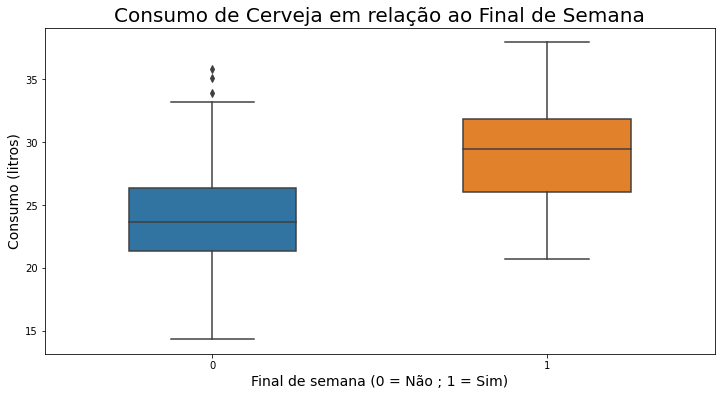

In [ ]:
import seaborn as sns

ax = sns.boxplot(data=df_cerveja, y='Consumo de cerveja (litros)', x='Final de Semana', orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja em relação ao Final de Semana', fontsize=20)
ax.set_ylabel('Consumo (litros)', fontsize=14)
ax.set_xlabel('Final de semana (0 = Não ; 1 = Sim)', fontsize=14)
ax


## Gráficos de dispersão: Temperatura Media (C) x Consumo de cerveja (litros)






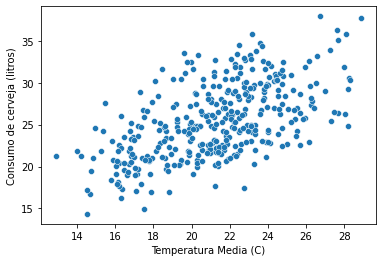

In [ ]:
sns.scatterplot(data=df_cerveja, x=df_cerveja['Temperatura Media (C)'], y="Consumo de cerveja (litros)", palette="deep", sizes=(20, 200))

## Gráficos de dispersão: Temperatura Minima (C) x Consumo de cerveja (litros)

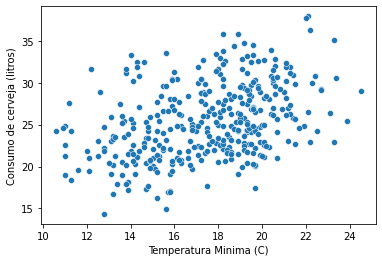

In [ ]:
sns.scatterplot(data=df_cerveja, x=df_cerveja['Temperatura Minima (C)'], y="Consumo de cerveja (litros)", palette="deep", sizes=(20, 200))

## Gráficos de dispersão: Temperatura Maxima (C) x Consumo de cerveja (litros)

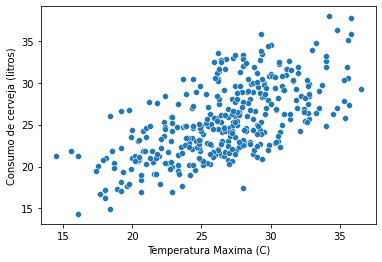

In [ ]:
sns.scatterplot(data=df_cerveja, x=df_cerveja['Temperatura Maxima (C)'], y="Consumo de cerveja (litros)", palette="deep", sizes=(20, 200))

## Gráficos de dispersão: Precipitacao (mm) x Consumo de cerveja 

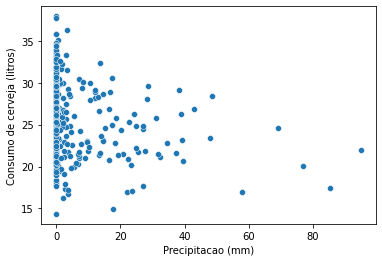

In [ ]:
sns.scatterplot(data=df_cerveja, x=df_cerveja['Precipitacao (mm)'], y="Consumo de cerveja (litros)", palette="deep", sizes=(20, 200))

## Gráficos de dispersão: Final de Semana x Consumo de cerveja 

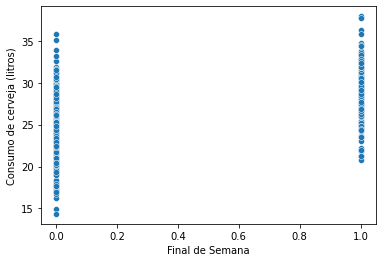

In [ ]:
sns.scatterplot(data=df_cerveja, x=df_cerveja['Final de Semana'], y="Consumo de cerveja (litros)", palette="deep", sizes=(20, 200))

## Construindo a reta de Regressão Linear

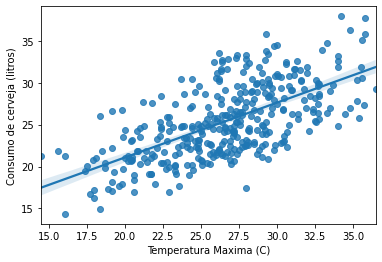

In [ ]:
ax = sns.regplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=df_cerveja)

## Preparando o modelo para ser treinado|

In [ ]:
y = df_cerveja['Consumo de cerveja (litros)']
X = df_cerveja[['Temperatura Maxima (C)','Final de Semana', 'Precipitacao (mm)']]

In [ ]:
y

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: float64

In [ ]:
X

,Temperatura Maxima (C),Final de Semana,Precipitacao (mm)
0,32.500000,0,0.0
1,33.500000,0,0.0
2,29.900000,1,0.0
3,28.600000,1,1.2
4,28.299999,0,0.0
...,...,...,...
360,28.200001,1,13.6
361,26.700001,0,0.0
362,24.100000,0,10.3
363,22.400000,0,6.3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Estimando a reta de Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()

### Treinando o modelo

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Fazendo a predição

In [ ]:
X_new = [[40, 0, 3]] # temp. máxima, fds, precip.
y_new = modelo.predict(X_new)
print("Nova entrada=%s, Valor predito: %s (em litros)" % (X_new, y_new)) 

Nova entrada=[[40, 0, 3]], Valor predito: [33.15909932] (em litros)


## Avaliando o modelo!

In [ ]:
print('R² = {}'.format(modelo.score(X_test, y_test)))


R² = 0.6907364691461402


## Como melhorar o desempenho do modelo??